# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [50]:
# --- dependencies and setup ---
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# --- import API key ---
from api_keys import weather_api_key

# --- incorporate citipy to determine city based on latitude and longitude ---
from citipy import citipy

# --- range of latitudes and longitudes ---
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate the Cities List by Using the `citipy` Library

In [51]:
# --- list for holding lat_lngs and cities ---
lat_lngs = []
cities = []

# --- create a set of random lat and lng combinations ---
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# --- identify nearest city for each lat, lng combination ---
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# --- print the city count to confirm sufficient count ---
len(cities)

579

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [52]:
# --- fahrenheit units ---
units = "metric"

# --- build partial query url for API call for fahrenheit data ---
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# --- create empty lists to hold required data ---
city_name = []
city_lats = []
city_lngs = []
city_temp = []
city_maxtemps = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []
date = []

# --- initialize count variables for counting city and set ---
item = 1
batch = 1

# --- print initial header before displaying for loop  data ---
print("Beginning Data Retrieval")
print("----------------------------")

# --- for loop go through the list of cities and perform a request for data on each city ---
for city in cities:
    
    # --- build query url with city name ---
    query_url = base_url + city
    
    # --- get the response as json ---
    data = requests.get(query_url).json()
    
    # --- retrieve required data into lists using exception handling ---
    try:
        print(f"Processing Record {item} of Set {batch} | {city}")  
        city_name.append(data["name"])
        city_country.append(data["sys"]["country"])
        city_lats.append(data["coord"]["lat"])
        city_lngs.append(data["coord"]["lon"])    
        city_temp.append(data["main"]["temp"])
        city_maxtemps.append(data["main"]["temp_max"])
        city_humidity.append(data["main"]["humidity"])
        city_cloudiness.append(data["clouds"]["all"])
        city_windspeed.append(data["wind"]["speed"])
        date.append(data["dt"])
        
        # --- increase item count by 1 ---
        item += 1
        
        # --- if statement to limit API calls to 50 using time.sleep (openweathermap API limits calls to 60/minute) ---
        if item > 50:
            # --- start a new set of items ---
            batch += 1
            
            # --- reset item count to 1 for next set ---
            item = 1
            
            # --- delay the execution to stay within the limits of the API query ---
            time.sleep(1)
    
    except:
        print(f"City '{city}' not found. Skipping...")
        
# --- print completion header after displaying for loop  data ---
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")
  
      

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | nelson
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | miyoshi
Processing Record 5 of Set 1 | maniitsoq
Processing Record 6 of Set 1 | leningradskiy
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | gigmoto
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | marawi
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | kungurtug
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | karkaralinsk
City 'karkaralinsk' not found. Skipping...
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | raudeberg
Processing Record 19 of Set 1 | tanout
Processing Record 20 of Set 1 | tubmanburg
Processing Record 21 of Set 1 | ugoo

Processing Record 17 of Set 4 | pisco
Processing Record 18 of Set 4 | codrington
Processing Record 19 of Set 4 | mrirt
City 'mrirt' not found. Skipping...
Processing Record 19 of Set 4 | ossora
Processing Record 20 of Set 4 | ilulissat
Processing Record 21 of Set 4 | ijaki
City 'ijaki' not found. Skipping...
Processing Record 21 of Set 4 | lata
Processing Record 22 of Set 4 | provideniya
Processing Record 23 of Set 4 | kamenskoye
City 'kamenskoye' not found. Skipping...
Processing Record 23 of Set 4 | urumqi
Processing Record 24 of Set 4 | chokurdakh
Processing Record 25 of Set 4 | pavlogradka
Processing Record 26 of Set 4 | rawson
Processing Record 27 of Set 4 | tuktoyaktuk
Processing Record 28 of Set 4 | chumikan
Processing Record 29 of Set 4 | babylon
Processing Record 30 of Set 4 | esperance
Processing Record 31 of Set 4 | kulhudhuffushi
Processing Record 32 of Set 4 | port antonio
Processing Record 33 of Set 4 | deputatskiy
Processing Record 34 of Set 4 | kvitok
Processing Record 

Processing Record 38 of Set 7 | katherine
Processing Record 39 of Set 7 | bokoro
Processing Record 40 of Set 7 | acu
Processing Record 41 of Set 7 | port lincoln
Processing Record 42 of Set 7 | kresttsy
Processing Record 43 of Set 7 | skagastrond
City 'skagastrond' not found. Skipping...
Processing Record 43 of Set 7 | tilichiki
Processing Record 44 of Set 7 | pochutla
Processing Record 45 of Set 7 | labutta
City 'labutta' not found. Skipping...
Processing Record 45 of Set 7 | arona
Processing Record 46 of Set 7 | binzhou
Processing Record 47 of Set 7 | paamiut
Processing Record 48 of Set 7 | halifax
Processing Record 49 of Set 7 | umzimvubu
City 'umzimvubu' not found. Skipping...
Processing Record 49 of Set 7 | zyryanka
Processing Record 50 of Set 7 | merrill
Processing Record 1 of Set 8 | nang rong
Processing Record 2 of Set 8 | inhambane
Processing Record 3 of Set 8 | neiafu
Processing Record 4 of Set 8 | saint-joseph
Processing Record 5 of Set 8 | baykit
Processing Record 6 of Set 

Processing Record 49 of Set 10 | krutinka
Processing Record 50 of Set 10 | mozarlandia
Processing Record 1 of Set 11 | evensk
Processing Record 2 of Set 11 | boende
Processing Record 3 of Set 11 | rosario do sul
Processing Record 4 of Set 11 | tokmak
Processing Record 5 of Set 11 | yining
Processing Record 6 of Set 11 | flin flon
Processing Record 7 of Set 11 | loukhi
Processing Record 8 of Set 11 | candelaria
Processing Record 9 of Set 11 | lerwick
Processing Record 10 of Set 11 | udagamandalam
Processing Record 11 of Set 11 | auki
Processing Record 12 of Set 11 | dicabisagan
Processing Record 13 of Set 11 | mehamn
Processing Record 14 of Set 11 | rawlins
Processing Record 15 of Set 11 | gold coast
Processing Record 16 of Set 11 | pandan
Processing Record 17 of Set 11 | thunder bay
Processing Record 18 of Set 11 | penzance
Processing Record 19 of Set 11 | koungou
Processing Record 20 of Set 11 | jiuquan
Processing Record 21 of Set 11 | sisimiut
Processing Record 22 of Set 11 | manono


In [53]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({"City": city_name,
                                "Country": city_country,
                                "Date": date,
                                "Lat": city_lats,
                                "Lng": city_lngs,
                                "Max Temp (C)": city_maxtemps,
                                "Humidity (%)": city_humidity,
                                "Cloudiness (%)": city_cloudiness,
                                "Wind Speed (mph)": city_windspeed,
                                })

# --- convert unix timestamp under date column to date,time using pd.to_datetime ---
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit = "s")


# Show Record Count
city_data_df.count()

City                525
Country             525
Date                525
Lat                 525
Lng                 525
Max Temp (C)        525
Humidity (%)        525
Cloudiness (%)      525
Wind Speed (mph)    525
dtype: int64

In [54]:
# Display sample data
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Bethel,US,2023-03-09 21:01:40,41.3712,-73.4140,9.41,51,36,2.24
1,Nelson,NZ,2023-03-09 21:01:40,-41.2833,173.2833,18.39,82,71,1.13
2,Puerto Ayora,EC,2023-03-09 21:01:31,-0.7393,-90.3518,26.97,89,98,5.81
3,Miyoshi City,JP,2023-03-09 21:00:27,35.0833,137.0667,14.32,72,80,1.06
4,Maniitsoq,GL,2023-03-09 21:01:41,65.4167,-52.9000,-7.58,74,2,3.95


In [55]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/Work/Documents/GitHub/Python-api-Challenge/output_data/cities.csv", index_label="City_ID")

In [56]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (mph)
City_ID,,,,,,,,,
0,Bethel,US,2023-03-09 21:01:40,41.3712,-73.4140,9.41,51,36,2.24
1,Nelson,NZ,2023-03-09 21:01:40,-41.2833,173.2833,18.39,82,71,1.13
2,Puerto Ayora,EC,2023-03-09 21:01:31,-0.7393,-90.3518,26.97,89,98,5.81
3,Miyoshi City,JP,2023-03-09 21:00:27,35.0833,137.0667,14.32,72,80,1.06
4,Maniitsoq,GL,2023-03-09 21:01:41,65.4167,-52.9000,-7.58,74,2,3.95


In [57]:
# --- find cities that have humidity over 100% ---
humidity_over_100 = city_data_df.loc[city_data_df["Humidity (%)"] > 100, :]

if humidity_over_100.empty == True:
    print("There are no cities with humidity values over 100%")
    print("Using original dataframe to continue with plotting...")
    
    # --- extract relevant fields from the data frame for plotting ---
    latitudes = city_data_df["Lat"]
    temperatures = city_data_df["Max Temp (C)"]
    humidity = city_data_df["Humidity (%)"]
    cloudiness = city_data_df["Cloudiness (%)"]
    windspeed = city_data_df["Wind Speed (mph)"]
    
else:
    # -- get the indices of cities that have humidity over 100% ---
    Humidityover100Index = humidity_over_100.index
    
    # --- create a clean DataFrame by dropping all humidity outliers by index found above ---
    clean_city_data = city_data_df.drop(Humidityover100Index).reset_index(drop=True)
    clean_city_data.head()
    
    # --- extract relevant fields from the data frame for plotting ---
    latitudes = clean_city_data["Lat"]
    temperatures = clean_city_data["Max Temp (C)"]
    humidity = clean_city_data["Humidity (%)"]
    cloudiness = clean_city_data["Cloudiness (%)"]
    windspeed = clean_city_data["Wind Speed (mph)"]

    # --- export the new dataframe into a csv ---
    clean_city_data.to_csv("../output_data/clean_city_data.csv", index=True, index_label="City ID", header=True)

There are no cities with humidity values over 100%
Using original dataframe to continue with plotting...


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

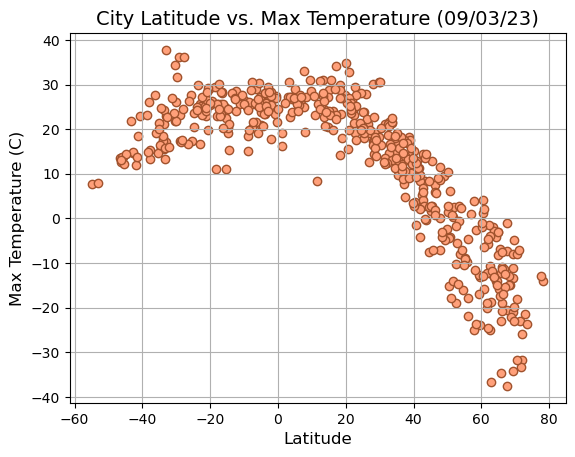

In [58]:
# Build scatter plot for latitude vs. temperature
plt.scatter(latitudes, temperatures, marker="o", facecolors="lightsalmon", edgecolors="sienna")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (09/03/23)", fontsize=14)
plt.ylabel("Max Temperature (C)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

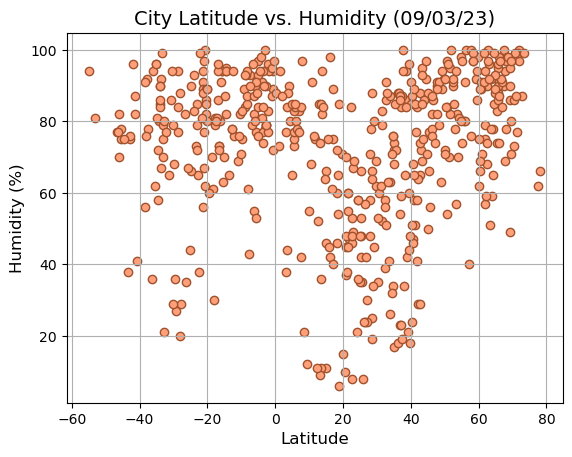

In [59]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(latitudes, humidity, marker="o", facecolors="lightsalmon", edgecolors="sienna")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (09/03/23)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

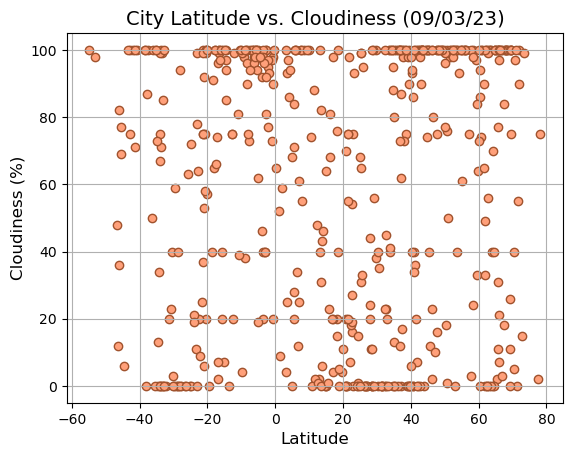

In [60]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(latitudes, cloudiness, marker="o", facecolors="lightsalmon", edgecolors="sienna")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (09/03/23)", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

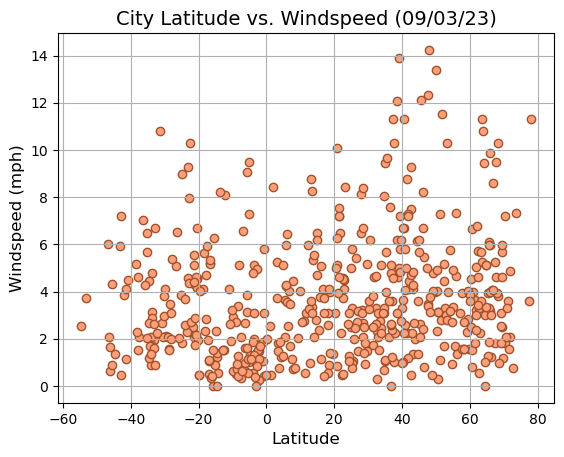

In [61]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(latitudes, windspeed, marker="o", facecolors="lightsalmon", edgecolors="sienna")

# Incorporate the other graph properties
plt.title("City Latitude vs. Windspeed (09/03/23)", fontsize=14)
plt.ylabel("Windspeed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, ax=None, **kwargs):
    
    #  use the axes specified 
    ax = ax
    
    #  get linear regression values and store in variables 
    slope, intercept, rvalue, pvalue, stderror = linregress(x,y)
    print(f"Linear Regression Completed...")    
    print(f"The R Squared is: {rvalue**2}")

    # y = m * x + b
    regress_values = slope * x + intercept
    
    # create line equation 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
                                                          
    # plot the linear model 
    ax.plot(x, regress_values, color="firebrick")
    
    # return the plot and line equation created 
    return ax, line_eq

In [67]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# find and store rows for Northern Hemisphere dataframe (greater than or equal to 0 degrees latitude)
if humidity_over_100.empty == True:
    northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :].copy().reset_index(drop=True)
else:
    northern_hemi_df = clean_city_data.loc[clean_city_data["Lat"] >= 0, :].copy().reset_index(drop=True)
    
#  extract relevant fields from both data frames for plotting
north_latitudes = northern_hemisphere["Lat"]
north_temperatures = northern_hemisphere["Max Temp (C)"]
north_humidity = northern_hemisphere["Humidity (%)"]
north_cloudiness = northern_hemisphere["Cloudiness (%)"]
north_windspeed = northern_hemisphere["Wind Speed (mph)"]    

# Display sample data
#northern_hemi_df.head()

    

In [66]:
# find and store rows for Southern Hemisphere dataframe (less than 0 degrees latitude)
if humidity_over_100.empty == True:
    southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :].copy().reset_index(drop=True)
else:
    southern_hemi_df = clean_city_data.loc[clean_city_data["Lat"] < 0, :].copy().reset_index(drop=True)    

# --- extract relevant fields from both data frames for plotting ---
south_latitudes = southern_hemisphere["Lat"]
south_temperatures = southern_hemisphere["Max Temp (C)"]
south_humidity = southern_hemisphere["Humidity (%)"]
south_cloudiness = southern_hemisphere["Cloudiness (%)"]
south_windspeed = southern_hemisphere["Wind Speed (mph)"]

#southern_hemi_df.head()

NameError: name 'southern_hemisphere' is not defined

###  Temperature vs. Latitude Linear Regression Plot

Linear Regression Completed...
The R Squared is: 0.8026958975458576


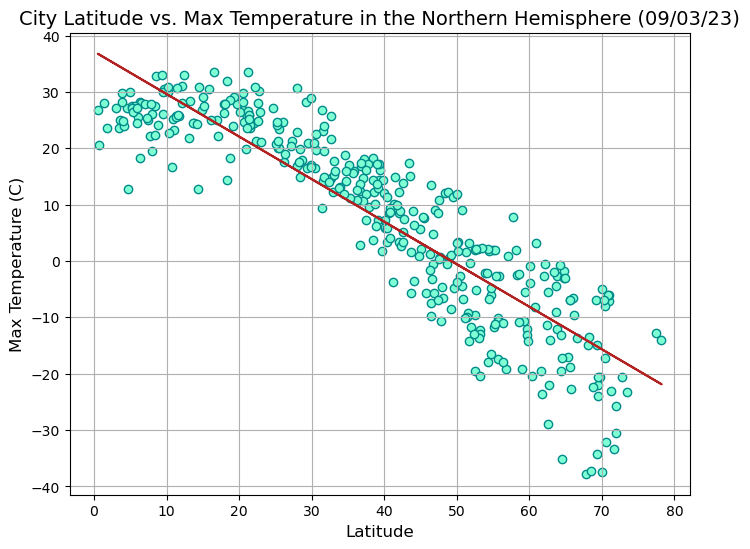

In [68]:
# Linear regression on Northern Hemisphere
# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_temperatures, marker="o", facecolors="aquamarine", edgecolors="darkcyan")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_temperatures, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Max Temperature in the Northern Hemisphere (09/03/23)", fontsize=14)
plt.ylabel("Max Temperature (C)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(5,45),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("output_data/Fig5.png")
plt.show()

NameError: name 'south_latitudes' is not defined

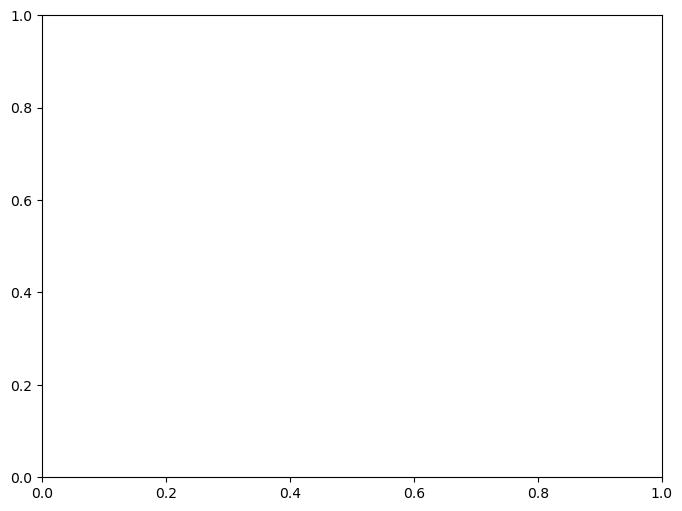

In [69]:
# Linear regression on Southern Hemisphere
# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_temperatures, marker="o", facecolors="gold", edgecolors="darkgoldenrod")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_temperatures, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Max Temperature in the Southern Hemisphere (09/03/23)", fontsize=14)
plt.ylabel("Max Temperature (C)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-25, 35),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("output_data/Fig6.png")
plt.show()

### Humidity vs. Latitude Linear Regression Plot

Linear Regression Completed...
The R Squared is: 0.03385652262546183


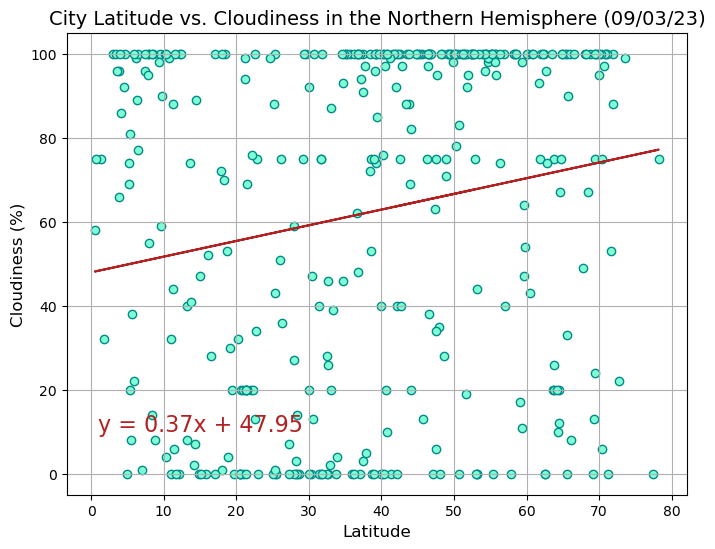

In [70]:
# Northern Hemisphere

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_cloudiness, marker="o", facecolors="aquamarine", edgecolors="darkcyan")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_cloudiness, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Cloudiness in the Northern Hemisphere (09/03/23)", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(1,10),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("output_data/Fig7.png")
plt.show()

NameError: name 'south_latitudes' is not defined

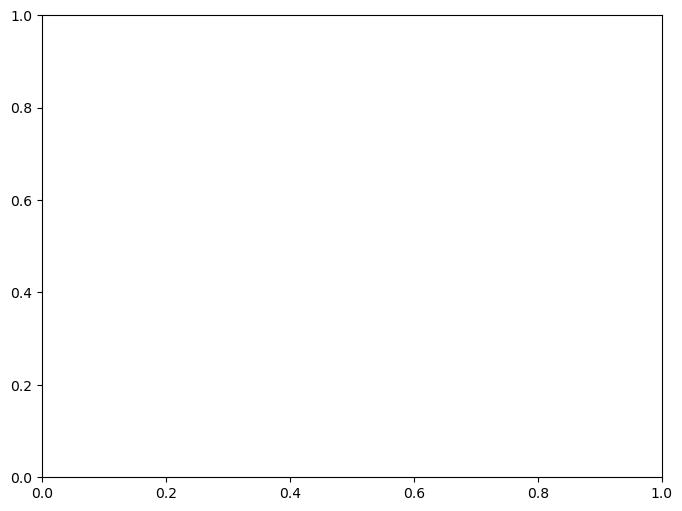

In [71]:
# Southern Hemisphere
# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_cloudiness, marker="o", facecolors="gold", edgecolors="darkgoldenrod")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_cloudiness, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Cloudiness in the Southern Hemisphere (09/03/23)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-55, 25),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("output_data/Fig8.png")
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

Linear Regression Completed...
The R Squared is: 0.03385652262546183


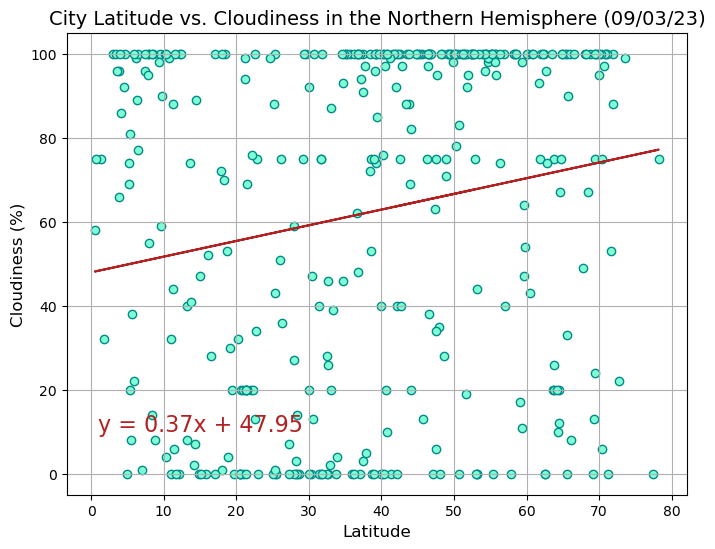

In [72]:
# Northern Hemisphere

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_cloudiness, marker="o", facecolors="aquamarine", edgecolors="darkcyan")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_cloudiness, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Cloudiness in the Northern Hemisphere (09/03/23)", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(1,10),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("output_data/Fig9.png")
plt.show()

NameError: name 'south_latitudes' is not defined

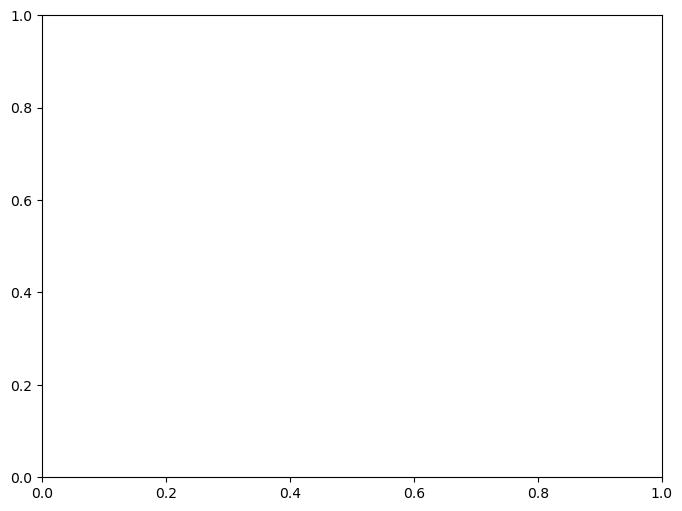

In [73]:
# Southern Hemisphere

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_cloudiness, marker="o", facecolors="gold", edgecolors="darkgoldenrod")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_cloudiness, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Cloudiness in the Southern Hemisphere (09/03/23)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-55, 25),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("output_data/Fig10.png")
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

Linear Regression Completed...
The R Squared is: 0.011708773971652368


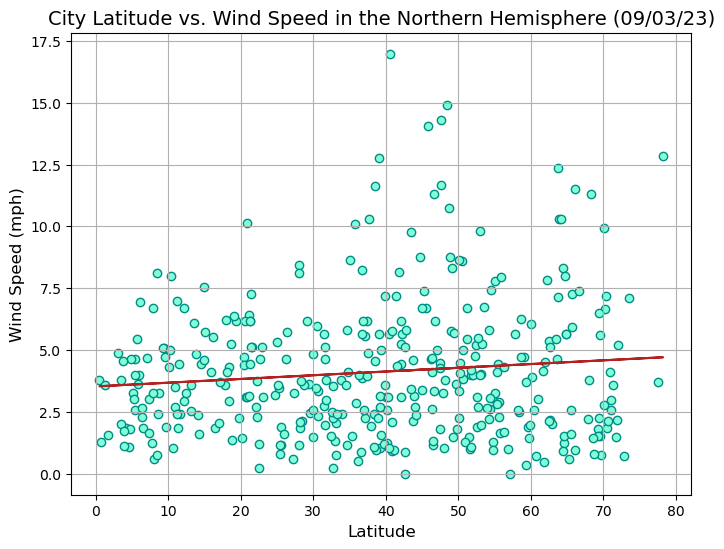

In [74]:
# Northern Hemisphere

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_windspeed, marker="o", facecolors="aquamarine", edgecolors="darkcyan")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_windspeed, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Wind Speed in the Northern Hemisphere (09/03/23)", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(5,26),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("output_data/Fig11.png")
plt.show()

NameError: name 'south_latitudes' is not defined

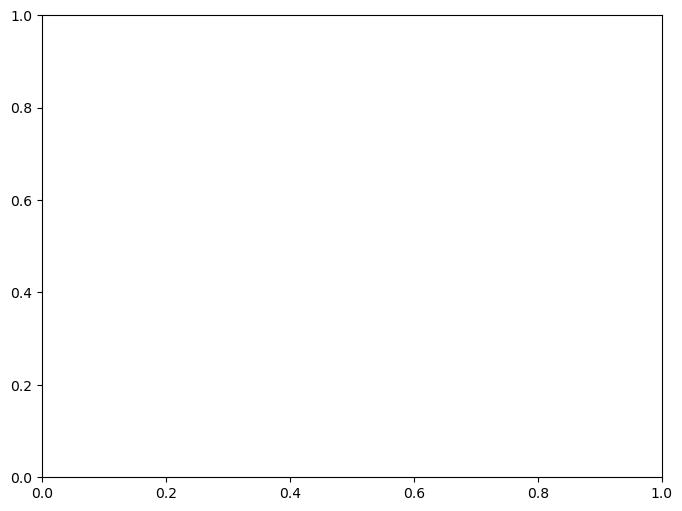

In [75]:
# Southern Hemisphere

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_windspeed, marker="o", facecolors="gold", edgecolors="darkgoldenrod")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_windspeed, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Wind Speed in the Southern Hemisphere (09/03/23)", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-55, 20),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("output_data/Fig12.png")
plt.show()